:::{currentmodule} tskit
:::

(sec_file_formats)=

# File formats


(sec_tree_sequence_file_format)=

## Tree sequence file format

To make tree sequence data as efficient and easy as possible to use, we store the
data on file in a columnar, binary format. The format is based on the
[kastore](https://pypi.org/project/kastore/) package, which is a simple
key-value store for numerical data. There is a one-to-one correspondence
between the tables described above and the arrays stored in these files.

By convention, these files are given the `.trees` suffix (although this
is not enforced in any way), and we will sometimes refer to them as ".trees"
files. We also refer to them as "tree sequence files".

:::{todo}
Link to the documentation for kastore, and describe the arrays that are
stored as well as the top-level metadata.
:::


### Legacy Versions

Tree sequence files written by older versions of tskit are not readable by
newer versions of tskit. For major releases of tskit, `tskit upgrade`
will convert older tree sequence files to the latest version.


(sec_text_file_format)=

## Text file formats

The tree sequence text file format is based on a simple whitespace
delimited approach. Each table corresponds to a single file, and is
composed of a number of whitespace delimited columns. The first
line of each file must be a **header** giving the names of each column.
Subsequent rows must contain data for each of these columns, following
the usual conventions. Each table has a set of mandatory and optional columns which are
described below. The columns can be provided in any order, and extra columns
can be included in the file. Note, in particular, that this means that
an `id` column may be present in any of these files, but it will be
ignored (IDs are always determined by the position of the row in a table).

The {meth}`load_text` method can be used to read tables in text format. This has been
used to create the following very simple tree sequence, with four nodes, two trees,
and three mutations at two sites, both on the first tree:

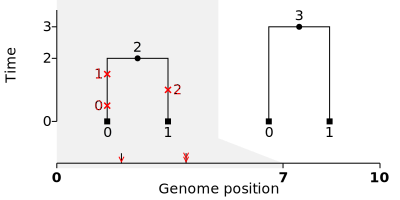

In [1]:
# TODO once https://github.com/tskit-dev/tskit/issues/1824 is solved
# change the individual table to include some with blank parents / locations
import io

import tskit
from IPython.display import SVG

individuals = """\
flags       location     parents
0           0.5,1.2      -1,-1
0           1.0,3.4      0,-1
0           3.5,6.3      0,1
0           0.5          -1,-1
0           0.5,0.5      2,3
"""

nodes = """\
is_sample   individual   time
1           0            0.0
1           0            0.0
0           -1           2.0
0           -1           3.0
"""
edges = """\
left   right   parent  child
0.0    7.0     2       0
0.0    7.0     2       1
7.0    10.0    3       0
7.0    10.0    3       1
"""

sites = """\
position      ancestral_state
2.0           AT
4.0           A
"""

mutations = """\
site   node    derived_state    time    parent
0      0       A                0.5     -1
1      0       T                1.5     -1
1      1       A                1.0     1
"""

migrations = """\
left   right   node   source   dest   time
0.0    0.7     5      2        3      1.0
0.8    0.9     8      3        4      3.0
"""

populations = """\
id   metadata
0    cG9wMQ==
1    cG9wMg==
"""

ts = tskit.load_text(
    individuals=io.StringIO(individuals),
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    # migrations=io.StringIO(migrations),  # uncomment when https://github.com/tskit-dev/tskit/issues/19 fixed
    populations=io.StringIO(populations),
    strict=False
)
SVG(ts.draw_svg(y_axis=True))

A deletion from AT to A has occurred at position 2 on the branch leading to
node 0, and two mutations have occurred at position 4 on the branch leading to
node 1, first from A to T, then a back mutation to A. The genotypes of our two
samples, nodes 0 and 1, are therefore AA and ATA. Note that this tree sequence
also contains entries in the individual, population,
and migration tables, but this is not shown plot above.


(sec_individual_text_format)=

### Individual text format

The individual text format must contain a `flags` column.
Optionally, there may also be `location`, `parents` and
`metadata` columns. See the
{ref}`individual table definitions<sec_individual_table_definition>`
for details on these columns.

Note that there are currently no globally defined `flags`, but the column
is still required; a value of `0` means that there are no flags set.

The `location` and `parents` columns should be a sequence of comma-separated numeric
values. They do not all have to be the same length.

In [2]:
import sys
from IPython.display import display, HTML

display(HTML("An example individual table:"))
ts.dump_text(individuals=sys.stdout)

id	flags	location	parents	metadata
0	0	0.5,1.2	-1,-1	
1	0	1.0,3.4	0,-1	
2	0	3.5,6.3	0,1	
3	0	0.5	-1,-1	
4	0	0.5,0.5	2,3	


(sec_node_text_format)=

### Node text format

The node text format must contain the columns `is_sample` and
`time`. Optionally, there may also be `population`, `individual`, and
`metadata` columns. See the
{ref}`node table definitions<sec_node_table_definition>` for details on these columns.

Note that we do not have a `flags` column in the text file format, but
instead use `is_sample` (which may be 0 or 1). Currently, `NODE_IS_SAMPLE` is
the only flag value defined for nodes, and as more flags are defined we will
allow for extra columns in the text format.

In [3]:
display(HTML("An example node table:"))
ts.dump_text(nodes=sys.stdout)

id	is_sample	time	population	individual	metadata
0	1	0.000000	-1	0	
1	1	0.000000	-1	0	
2	0	2.000000	-1	-1	
3	0	3.000000	-1	-1	


(sec_edge_text_format)=

### Edge text format

The edge text format must contain the columns `left`,
`right`, `parent` and `child`. Optionally, there may also be
a `metadata` column.
See the {ref}`edge table definitions <sec_edge_table_definition>`
for details on these columns.

In [4]:
display(HTML("An example edge table:"))
ts.dump_text(edges=sys.stdout)

left	right	parent	child	metadata
0.000000	7.000000	2	0	
0.000000	7.000000	2	1	
7.000000	10.000000	3	0	
7.000000	10.000000	3	1	


(sec_site_text_format)=

### Site text format

The site text format must contain the columns `position` and
`ancestral_state`. The `metadata` column may also be optionally
present. See the
{ref}`site table definitions <sec_site_table_definition>`
for details on these columns.

In [5]:
display(HTML("An example site table:"))
ts.dump_text(sites=sys.stdout)

position	ancestral_state	metadata
2.000000	AT	
4.000000	A	


(sec_mutation_text_format)=

### Mutation text format

The mutation text format must contain the columns `site`,
`node` and `derived_state`. The `time`, `parent` and `metadata` columns
may also be optionally present (but `parent` must be specified if
more than one mutation occurs at the same site). If `time` is absent
`UNKNOWN_TIME` will be used to fill the column. See the
{ref}`mutation table definitions <sec_mutation_table_definition>`
for details on these columns.

In [6]:
display(HTML("An example mutation table:"))
ts.dump_text(mutations=sys.stdout)

site	node	time	derived_state	parent	metadata
0	0	0.5	A	-1	
1	0	1.5	T	-1	
1	1	1.0	A	1	


(sec_migration_text_format)=

### Migration text format

The migration text format must contain the columns `left`,
`right`, `node`, `source`, `dest` and `time`. The `metadata` column
may also be optionally present. See the
{ref}`migration table definitions <sec_migration_table_definition>`
for details on these columns.

In [7]:
display(HTML("An example migration table:"))
print(migrations)  # fixme
# ts.dump_text(migrations=sys.stdout)

left   right   node   source   dest   time
0.0    0.7     5      2        3      1.0
0.8    0.9     8      3        4      3.0



(sec_population_text_format)=

### Population text format

Population tables only have a `metadata` column, so the text format for
a population table requires there to be a `metadata` column. See the
{ref}`population table definitions <sec_population_table_definition>` for
details.

In [8]:
display(HTML("An example population table:"))
ts.dump_text(populations=sys.stdout)

id	metadata
0	cG9wMQ==
1	cG9wMg==


The `metadata` contains base64-encoded data (in this case, the strings
`pop1` and `pop1`).